# Homework set 4

Before you turn this problem in, make sure everything runs as expected (in the menubar, select Kernel → Restart Kernel and Run All Cells...).

Please **submit this Jupyter notebook through Canvas** no later than **Mon Nov. 28, 9:00**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. A pdf version can be made using the save and export option in the Jupyter Lab file menu.**

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Karin Brinksma 13919938 Dominique Weltevreden 12161160

# About imports
Please import the needed packages by yourself.

# Sparse matrices
A _sparse matrix_ or _sparse array_ is a matrix in which most of the elements are zero. There is no strict definition how many elements need to be zero for a matrix to be considered sparse. In many examples, the number of nonzeros per row or column is a small fraction, a few percent or less, of the total number of elements of the row or column. By contrast, if most of the elements are nonzero, then the matrix is considered _dense_. 

In the context of software for scientific computing, a sparse matrix typically refers to a storage format, in which elements which are known to be zero are not stored. In Python, the library `scipy.sparse` defines several sparse matrix classes, such as `scipy.sparse.coo_matrix`. To construct such an object, one passes for each nonzero element the value, and the row and column coordinates. In some cases, one can also just pass the nonzero (off-)diagonals, see `scipy.sparse.diags`.

Functions for dense matrices do not always work with sparse matrices. For example for the product of a sparse matrix with a (dense) vector, there is the member function `scipy.sparse.coo_matrix.dot`, and for solving linear equations involving a sparse matrix, there is the function `scipy.sparse.linalg.spsolve`.

In [1]:
# Import some basic packages
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.sparse import coo_matrix, diags, SparseEfficiencyWarning
from scipy.sparse.linalg import spsolve

import warnings
warnings.simplefilter('ignore', SparseEfficiencyWarning)  # Suppress confusing warning

In [2]:
# This is how to create a sparse matrix from a given list of (row, column, value) tuples.
row  = [0,   3,   1,   0]
col  = [0,   3,   1,   2]
data = [4.0, 5.0, 7.0, 9.0]
M = coo_matrix((data, (row, col)), shape=(4, 4))

print("When printing a sparse matrix, it shows its nonzero entries:")
print(M)

print("If you want to see its `dense` matrix form, you have to use `mat.toarray()`:")
print(M.toarray())

# This is how to perform matrix-vector products.
x = np.array([1, 2, 3, 4])
print("For x={}, Mx = {}".format(x, M.dot(x)))

When printing a sparse matrix, it shows its nonzero entries:
  (0, 0)	4.0
  (3, 3)	5.0
  (1, 1)	7.0
  (0, 2)	9.0
If you want to see its `dense` matrix form, you have to use `mat.toarray()`:
[[4. 0. 9. 0.]
 [0. 7. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 5.]]
For x=[1 2 3 4], Mx = [31. 14.  0. 20.]


This matrix has values on its diagonal and on offdiagonals 1 and 2 rows ABOVE it.
[[1. 1. 1. 0.]
 [0. 2. 2. 2.]
 [0. 0. 3. 3.]
 [0. 0. 0. 4.]]
This matrix has values on its diagonal and on offdiagonals 1 and 2 rows BELOW it.
[[1. 0. 0. 0.]
 [1. 2. 0. 0.]
 [1. 2. 3. 0.]
 [0. 2. 3. 4.]]
If you want to visualize the matrix for yourself, use `plt.imshow`:


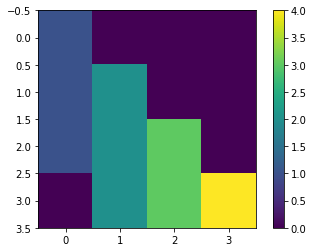

For b=[1 2 3 4], the solution x to Mx=b is [1.         0.5        0.33333333 0.5       ]
And indeed, Mx - b = [0. 0. 0. 0.]


In [3]:
# This is how to create a sparse matrix from a given list of subdiagonals.
diagonals = [[1, 2, 3, 4], [1, 2, 3], [1, 2]]
M = diags(diagonals, [0, 1, 2])
print("This matrix has values on its diagonal and on offdiagonals 1 and 2 rows ABOVE it.")
print(M.toarray())

M = diags(diagonals, [0, -1, -2])
print("This matrix has values on its diagonal and on offdiagonals 1 and 2 rows BELOW it.")
print(M.toarray())

print("If you want to visualize the matrix for yourself, use `plt.imshow`:")
plt.imshow(M.toarray())
plt.colorbar()
plt.show()

# This is how to solve sparse systems.
b = np.array([1, 2, 3, 4])
x = spsolve(M, b)
print("For b={}, the solution x to Mx=b is {}".format(b, x))
print("And indeed, Mx - b = {}".format(M.dot(x) - b))

--------
# Exercise 1
Consider the following boundary value problem involving a nonlinear ordinary differential equation:

$$ \tag{1} y''(x) + \exp(y(x)) = 0, \quad 0 < x < 1, \quad y(0) = y(1) = 0.$$

The purpose of this exercise is to approximate the solution to this boundary value problem, by discretizing the problem and then solving the resulting system of nonlinear equations. 

Problem (1) will be discretized using finite differences. Suppose we use $n+2$ discretization points for $x$, denoted $x_k = kh$ for $k \in \{0, \ldots, n+1\}$ and $h = 1/(n+1)$. The approximate solution is denoted $y_k = y(x_k)$. 

We will use a _second-order central finite difference_ approximation for the second derivative: 

$$ \tag{2} y''(x_k) \approx \frac{y_{k-1} - 2 y_k + y_{k+1}}{h^2}.$$

The term $\exp(y(x_k))$ can simply be approximated by $\exp(y_k)$. Thus for $x=x_k$, equation (1) becomes

$$ \tag{3} \frac{y_{k-1} - 2 y_k + y_{k+1}}{h^2} + \exp y_k = 0, \quad k = 1, \ldots, n.$$

The boundary conditions (the conditions $y(0) = y(1) = 1$), lead to the requirement that $y_0 = y_{n+1} = 0$. To find the remaining values $y_k$, $k=1, \ldots, n$, equation (3) will be used for $k = 1, \ldots, n$. In this way, one obtains $n$ equations for $n$ unknowns, to which, in principle, a rootfinding method can be applied.

We will write $\vec y = \begin{bmatrix} y_1 \\ \vdots \\ y_n \end{bmatrix}$ for the vector of values to be determined. 


## (a)  (2 pts)
As a first step, finish the function `SecondDerMatrix` that returns a matrix $\bf{M}$ that maps the vector $\vec y$ to the vector of the approximate values $y''(x_k)$, $k=1, \ldots, n$ given in (2). To get full points for this part of the exercise you must create output in the form of a sparse matrix.

In [4]:
def SecondDerMatrix(n):
    """
    Creates a sparse matrix that maps the y vector to the vector of approximate values y'' given above in equation 2. 
    Input:
    n = integer, equal to length of the y vector
    
    Returns:
    M = sparse matrix
    """
    # Calculate h
    h = 1 / (n + 1)
    
    # Create diagonals of the matrix based on k-1, k and k+1
    m_below = [1] * (n-1)
    m_diag = [-2] * n
    m_above = [1] * (n-1)
    
    # Create sparse matrix
    m_diagonals = [m_below, m_diag, m_above]
    
    # Finish up equation 2 by the division
    M = diags(m_diagonals, [-1, 0, 1]) / (h**2)
    
    return M

## (b)  (1 pt)
Second-order central finite differences are exact for quadratic functions. In order to test your implementation, choose $n=10$ and apply the second derivative matrix from part (a) to a quadratic function $y(x)$ with $y(0) = y(1) = 0$ for which you know the second derivative $y''(x)$.

In [5]:
def get_vector_y(n):
    """
    Quadratic function y(x) for which y(0) = y(1) = 0
    """
    y = np.empty(n)
    
    # Make the y vector
    for i in range(n):
        x = (i + 1) / (n + 1)
        y[i] = x ** 2 - x
    return y

n = 10
M_10 = SecondDerMatrix(n)
vec_y = get_vector_y(n)
sol = coo_matrix.dot(M_10, vec_y)
y_sec_der = 2 * np.ones(n)

# See if the solution calculated and what should the the solution match
print(sol)
print(y_sec_der)

assert np.allclose(sol-y_sec_der, 0)

[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]


## (c) (2 pts)

Defining $\vec y = \begin{bmatrix} y_1 \\ \vdots \\ y_n \end{bmatrix}$ and 
$E(\vec y) = \begin{bmatrix} \exp(y_1) \\ \vdots \\ \exp(y_n) \end{bmatrix}$, the equations (3) can be written in the form

$$ F(\vec y) := {\bf M} \cdot \vec y + E(\vec y) = \vec 0. $$

Finish the function `F` that defines $F(\vec y) = {\bf M} \cdot \vec y + E(\vec y)$.
Finish the function `JacobianF` that computes the Jacobian ${\bf J}_F(\vec y)$ of $F(\vec y)$.
To get full points for this part of the exercise, the Jacobian must be computed in the form of a sparse matrix.

In [6]:
def F(y):
    """
    Returns a matrix with the solution of the function given above as equation 3
    Input: 
    y = a vector
    
    Returns: 
    A matrix
    """
    # Get n from the y vector
    n = len(y)
    
    # Calculate the second derivative matrix with this n
    M = SecondDerMatrix(n)
    
    # Get the second term of the equation
    E_y = np.exp(y)
    
    # Return the rest of the equation
    return coo_matrix.dot(M, y) + E_y
    
def JacobianF(y):
    """
    Computes the Jacobian of the F(y) function; 
    Input:
    y = a vector
    
    Return: 
    a sparse matrix
    """
    # Get n from the y vector
    n = len(y)
    
    # Calculate the second derivative matrix with this n
    M = SecondDerMatrix(n)
    
    # Get the second term of the equation
    E_y = np.exp(y)
    
    # Form a sparse matrix from the E_y
    diagonal = diags([E_y], [0])
    
    # Complete the Jacobian with the values
    return M + diagonal
    

## (d)  (3 pts)
1. Write down the first order Taylor expansion $T_F(\vec y, \vec s)$ for $F(\vec y+\vec s)$.
2. In order to check your implementation of the Jacobian matrix, compute and print both $F(\vec y+\vec s)$ and its first order Taylor approximation $T_F(\vec y, \vec s)$ for a choice $\vec y$ and $\vec s$.
3. Verify numerically that the error $||F(\vec y + \vec s) - T_F(\vec y, \vec s)||_2$ is $\mathcal O(||\vec s||_2^2)$. Hint: take vectors $\vec s$ with $\|\vec s\|_2 = \mathcal O(h)$  for multiple values for $h$, e.g. $h = 10^{-k}$ for a range of $k$. 

Subquestion 1.
\begin{equation}
f(\vec y+\vec s)=f(\vec y)+\nabla f(\vec y)^T \vec s
\end{equation}
As per page 228 of the book Scientific Computing

F(y+s) is: 
[  3.84985881   2.01375271   5.50416602 -47.54696758]
The first-order taylor expansion is: 
[  3.8262051    1.88980233   5.13795403 -48.67386986]


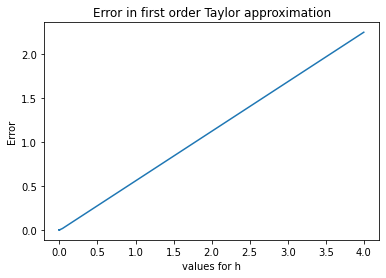

In [7]:
# Subquestions 2 and 3.
def taylor_exp(y, s):
    """
    Calculate the first order Taylor approximation of the function F given above
    Input:
    y = vector
    s = vector of the same length of y
    
    Returns:
    A matrix
    """
    # Get the first term
    F_value = F(y)
    
    # Second term uses the first derivative, which can be gotten from the Jacobian Matrix
    second_term = coo_matrix.dot(JacobianF(y).T, s)
    return F_value + second_term

y = np.array((0.1, 0.3, 0.5, 0.7))
s = np.array((0.2, 0.4, 0.6, 0.9))


print(f"F(y+s) is: \n{F(y+s)}")
print(f"The first-order taylor expansion is: \n{taylor_exp(y,s)}")

# Subquestion 3
def get_error(y, s):
    """
    Calculate the error by taking the norm of the true value and the approximation.
    Input:
    y = vector
    s = vector of the same length of y
    
    Returns:
    A float
    
    
    """
    return np.linalg.norm(F(y + s) - taylor_exp(y, s))

def plot_error(y):
    """
    Plots the error given by get_error for a given y and an s calculated based on a h.
    """
    k = 25
    O_h = np.empty((k))
    error = np.empty((k))
    for i in range(k):
        
        # Calculate s given that the norm of s is O(h)
        s = 1 / (np.power(10, i)) * np.ones(len(y))
        O_h[i] = np.linalg.norm(s) ** 2
        error[i] = get_error(y, s)
        
    # Plot values
    plt.plot(O_h, error)
    plt.xlabel("values for h")
    plt.ylabel("Error")
    plt.title("Error in first order Taylor approximation")
    plt.show()
    
plot_error(y)


## (e) (2 pts)
1. Finish the function `NewtonSolve` below to solve the system of equations.
2. Take $n=40$, and experiment with your function. Try to find a choice of `y0` such that the method doesn't converge, as well as a choice of `y0` such that the method converges. In your answer, list the types of convergence behavior you found. Show a convergent example (if you found any) and a nonconvergent example (if you found any). Show the solutions you found for each example.

In [8]:
# Subquestion 1.
def NewtonSolve(y0, K):
    """ Use Newton's method to solve F(y) = 0 with initial guess y0 and K iterations. Taken from Ch5 of Scientific Computing,
    Algorithm 5.4"""
    y = y0
    error = []
    
    # Loop for K
    for i in range(K):
        # Compute Newton Step
        A = JacobianF(y)
        b = -F(y)
        s_k = spsolve(A, b)
        
        # Update solution
        y = y + s_k
        
        # Compute error of this solution by calculating the F of y, which should be 0 as this is the solution we are looking
        # for
        error.append(np.linalg.norm(F(y)))
    return y, error

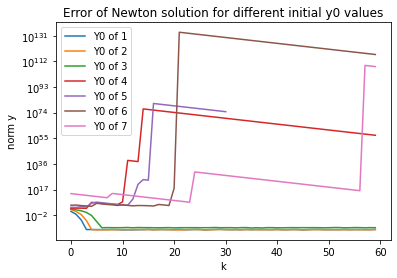

Solutions for an Y0 of 2, for which the method converged: 
[0.01310082 0.0255989  0.03748668 0.04875685 0.05940242 0.06941669
 0.07879331 0.08752629 0.09560996 0.10303907 0.10980872 0.11591445
 0.12135218 0.12611827 0.13020952 0.13362316 0.13635686 0.13840878
 0.1397775  0.1404621  0.1404621  0.1397775  0.13840878 0.13635686
 0.13362316 0.13020952 0.12611827 0.12135218 0.11591445 0.10980872
 0.10303907 0.09560996 0.08752629 0.07879331 0.06941669 0.05940242
 0.04875685 0.03748668 0.0255989  0.01310082]
Solutions for an Y0 of 7, for which the method did not converge: 
[125.26975378 248.82562943   9.95468174  11.06263431  17.03009166
  11.04327428   8.23584401  15.4083483    9.25618688  12.96940846
  16.17394695  19.37923865  33.85025234  13.73116701  10.85323032
  24.20135023  24.8706673   17.72140317  12.42410391 -22.04939651
 -21.89902509  12.40410976  17.67409327  24.73002799  24.20485954
  10.85329231  13.7311669   33.85025236  19.37923899  16.17394645
  12.96940709   9.25619295  15.

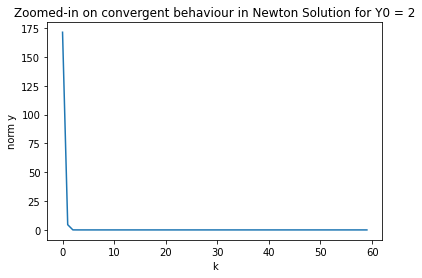

In [9]:
# Subquestion 2, code part

k = 60
n = 40

for y0s in np.arange(1, 8, 1):
    y = np.ones((n)) * y0s
    y, error = NewtonSolve(y, k)
    plt.semilogy(np.arange(k), error, label = f"Y0 of {y0s}")
    
plt.title("Error of Newton solution for different initial y0 values")
plt.xlabel("k")
plt.ylabel("norm y")
plt.legend()
plt.show()

print(f"Solutions for an Y0 of 2, for which the method converged: \n{(NewtonSolve(np.ones((40))*2, 60))[0]}")

print(f"Solutions for an Y0 of 7, for which the method did not converge: \n{(NewtonSolve(np.ones((40))*7, 60))[0]}")

# Zoom in on convergent behaviour
y = np.ones((n)) * 2
y, error = NewtonSolve(y, k)
plt.plot(np.arange(k), error)
plt.xlabel("k")
plt.ylabel("norm y")
plt.title("Zoomed-in on convergent behaviour in Newton Solution for Y0 = 2")
plt.show()

The Newton method does not converge when the y0 is too different from the final solution. In the graph, Y0s under 4 converge, where an Y0 above 3 does not, for a k of 60. 

When printing the non-converged solutions, it can be seen that the values of Y are quite large, where the values of Y for the converged situation are quite small. This indicates that the true solution is a small Y, which would explain why the method only converges for smaller Y0 values.

When looking at the zoomed-in plot on convergent behaviour for Y0 = 2 in a regular, non-log plot, the convergence can be seen to be superlinear, rapidly converging to a certain solution at an early k. In the overview plot, convergence seems to come quickly for the values that actually converge, while values that do not converge seem to bounce between approaching convergence before spiking. 